<a href="https://colab.research.google.com/github/eddielin0926/kaggle/blob/main/notebooks/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
Start here! Predict survival on the Titanic and get familiar with ML basics  


## Preparation

In [95]:
! pip install --upgrade -q pip
! pip install --upgrade -q kaggle
! pip install --upgrade -q flaml

Set environment variable for kaggle authentication from Colab Secrets.

In [96]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

Set competition name.

In [97]:
COMPETITION = "titanic"

Download competition dataset.

In [98]:
! mkdir -p data
! kaggle competitions download -c {COMPETITION}
! unzip -o {COMPETITION}.zip -d data

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


Import libraries.

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

Read training and testing dataset.

In [100]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

Submission id and target.

In [101]:
ID = "PassengerId"
TARGET = "Survived"

## Exploratory Data Analysis

### Train Dataset

In [102]:
display(df_train.shape)
display(df_train.head())

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Test Dataset

In [105]:
display(df_test.shape)
display(df_test.head())

(418, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [107]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Survival

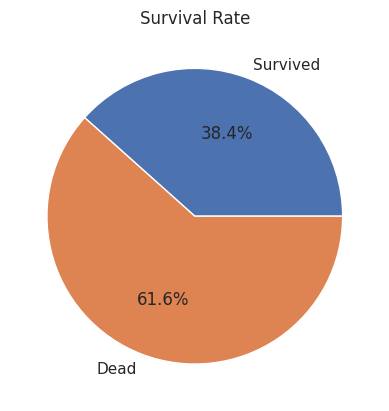

In [108]:
survived = df_train[df_train['Survived'] == 1]
dead = df_train[df_train['Survived'] == 0]

plt.title("Survival Rate")
plt.pie([len(survived), len(dead)], labels=["Survived", "Dead"], autopct="%0.1f%%")
plt.show()

### Sex

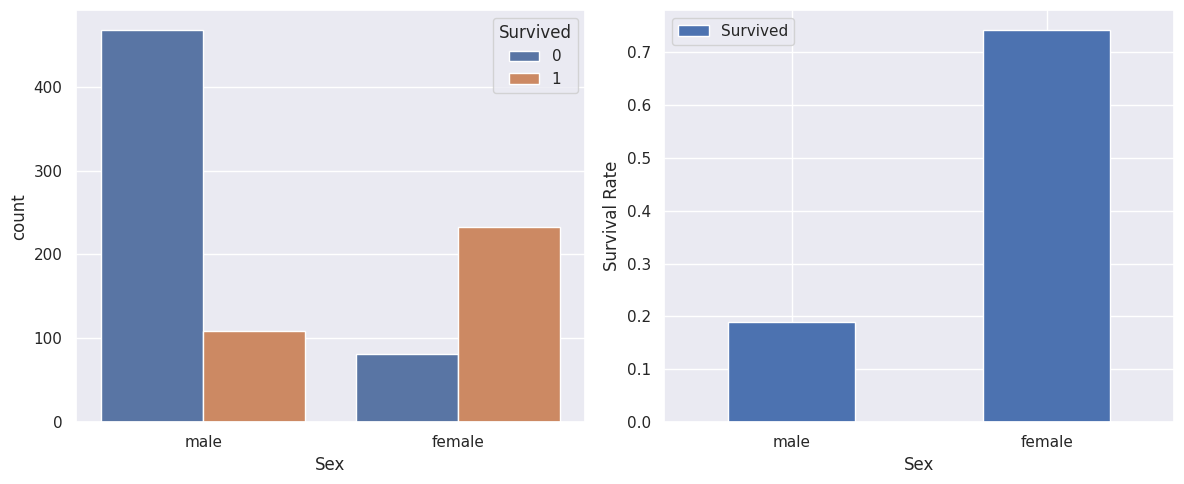

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(df_train, x="Sex", hue="Survived", ax=axs[0])
ss = df_train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(["Sex"], ascending=False)
ss.plot(kind="bar", xlabel="Sex", ylabel="Survival Rate", rot=0, ax=axs[1])

plt.tight_layout()
plt.show()

### PClass

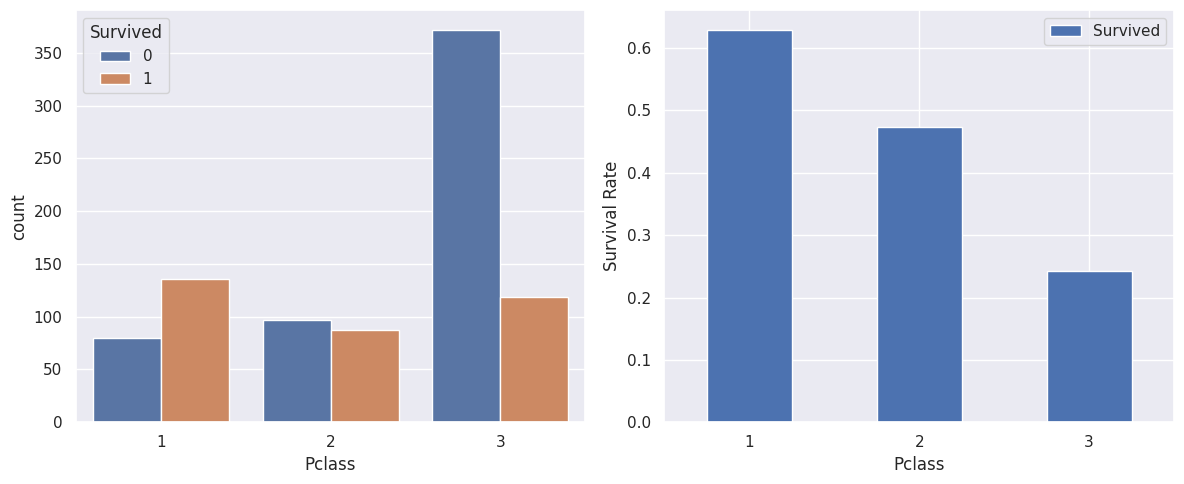

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(df_train, x="Pclass", hue="Survived", ax=axs[0])
ps = df_train[["Pclass", "Survived"]].groupby(['Pclass']).mean()
ps.plot(kind="bar", xlabel="Pclass", ylabel="Survival Rate", rot=0, ax=axs[1])

plt.tight_layout()
plt.show()

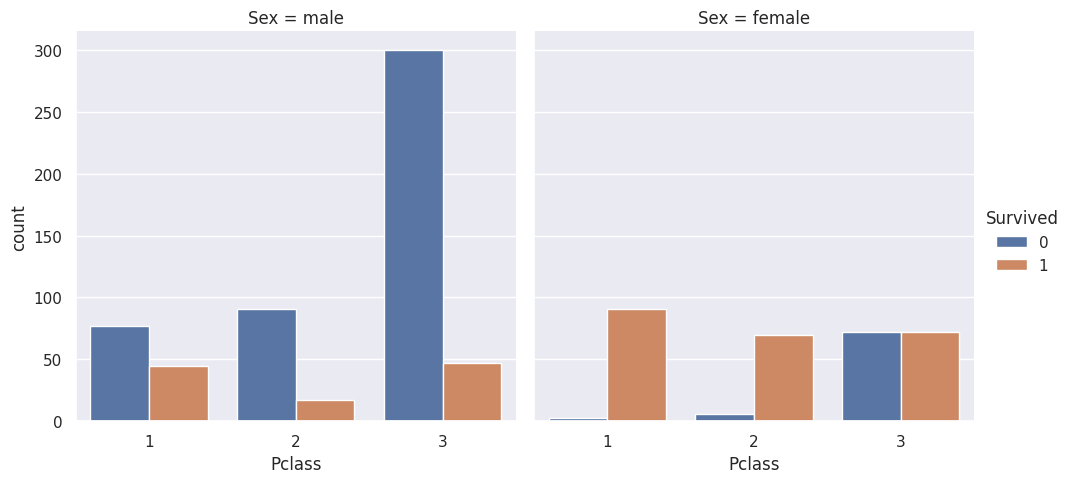

In [111]:
sns.catplot(kind='count', data=df_train, x='Pclass', col='Sex', hue='Survived')
# TODO: Plot each class survival rate group by sex

### Age

<Axes: xlabel='Age', ylabel='Count'>

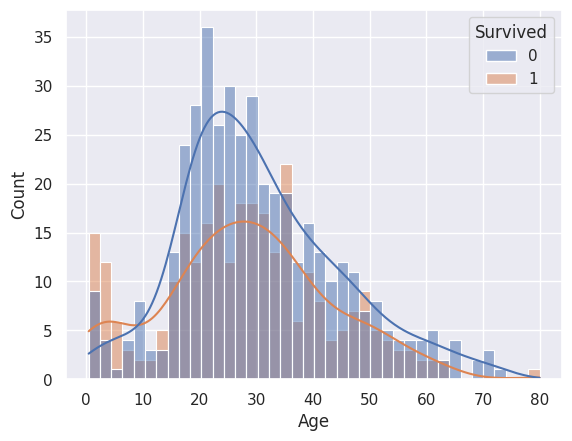

In [112]:
sns.histplot(data=df_train, x='Age', bins=40, hue='Survived', kde=True)

## Data Preprocessing

### Flare

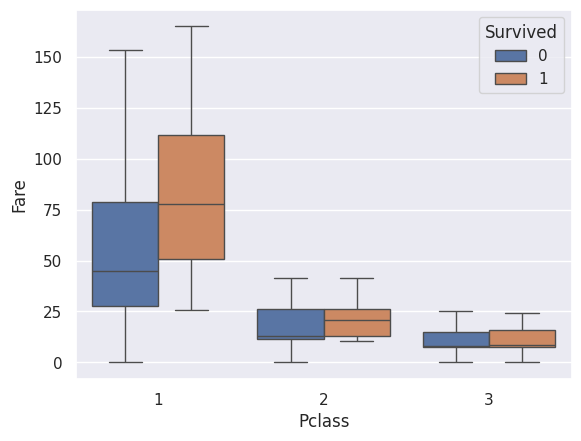

In [113]:
sns.boxplot(data=df_train, x='Pclass', y='Fare', hue='Survived', showfliers=False)
plt.show()

In [114]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [115]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(df_train[['Fare']])

df_train["ScaledFare"] = rs.transform(df_train[['Fare']])
df_test["ScaledFare"] = rs.transform(df_test[["Fare"]])

df_train["ScaledFare"].describe()

count    891.000000
mean       0.768745
std        2.152200
min       -0.626005
25%       -0.283409
50%        0.000000
75%        0.716591
max       21.562738
Name: ScaledFare, dtype: float64

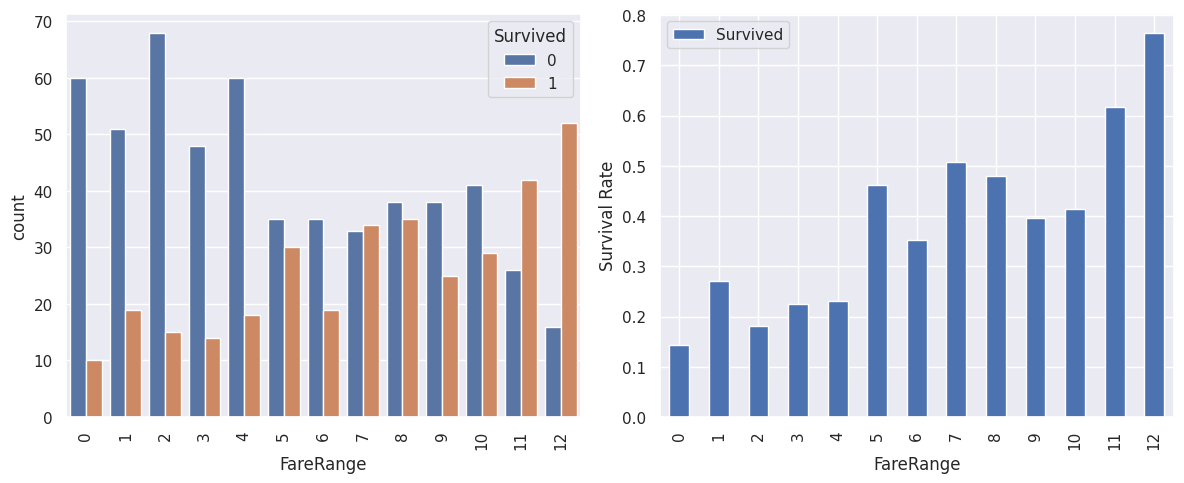

In [116]:
df_train["FareRange"], bins = pd.qcut(df_train["Fare"], 13, labels=False, retbins=True)
bins = np.concatenate(([-np.inf], bins[1:-1], [np.inf]))
df_test["FareRange"] = pd.cut(df_test["Fare"], bins, labels=False)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(df_train, x="FareRange", hue="Survived", ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)
ps = df_train[["FareRange", "Survived"]].groupby(['FareRange']).mean()
ps.plot(kind="bar", xlabel="FareRange", ylabel="Survival Rate", ax=axs[1])

plt.tight_layout()
plt.show()

### Courtesy Title

<Axes: >

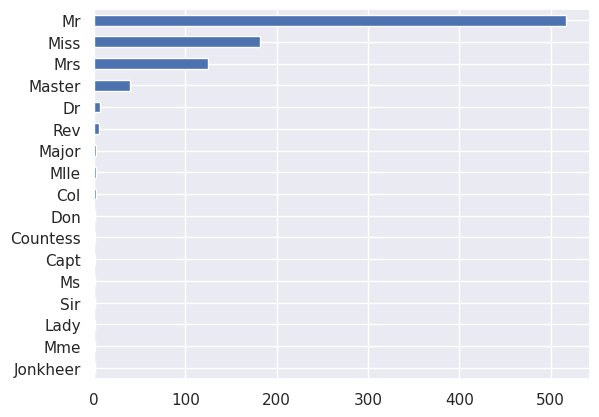

In [117]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.')
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.')

df_train['Title'].value_counts().sort_values().plot(kind="barh")

| Courtesy Title | Description                                                                    |
|:-------------- |:------------------------------------------------------------------------------ |
| Mr             | Man without specifying marital status or profession                            |
| Miss           | Unmarried woman or girl                                                        |
| Mrs            | Married woman                                                                  |
| Master         | Boy                                                                            |
| Rev            | Reverend, member of the clergy                                                 |
| Dr             | Doctor, a person who has obtained a doctoral degree or who is a medical doctor |
| Col            | Colonel, a military rank                                                       |
| Mlle           | Mademoiselle, an unmarried woman or girl in French                             |
| Major          | A military rank                                                                |
| Ms             | A woman without specifying her marital status                                  |
| Lady           | A woman of noble or high social rank                                           |
| Mme            | Madame, a married woman in French                                              |
| Countess       | A woman's title of nobility ranking                                            |
| Dona           | A woman of rank, nobility, or authority in Spanish-speaking areas              |
| Jonkheer       | A Dutch honorific of nobility, similar to the English "sir."                   |
| Capt           | Captain, a military rank or professional title                                 |
| Sir            | A man of rank or authority, particularly a knight                              |
| Don            | A man of rank, nobility, or authority in Spanish-speaking areas                |

<Axes: xlabel='Title', ylabel='Survived'>

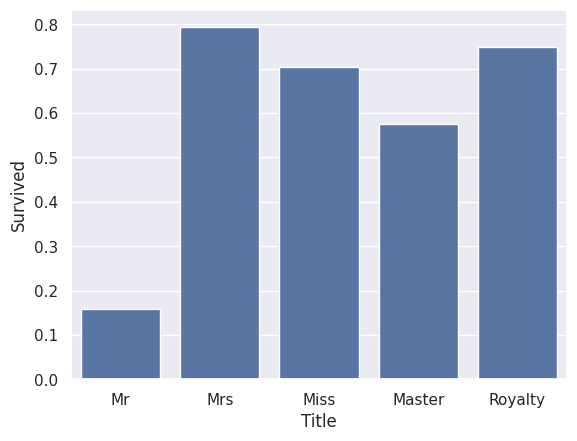

In [118]:
def set_title(x):
    title = x["Title"]
    sex = x["Sex"]
    if title in ['Sir', 'Jonkheer', 'Countess', 'Lady']:
        return 'Royalty'
    elif title in ['Capt', 'Col', 'Major', 'Don', 'Rev']:
        return 'Mr'
    elif title in ['Mlle', 'Mme', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if sex == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    elif title in ['Master', 'Mr', 'Mrs', 'Miss']:
        return title
    else:
        if sex == 'male':
            return 'Mr'
        else:
            return 'Mrs'

df_train["Title"] = df_train.apply(set_title, axis=1)
df_test["Title"] = df_test.apply(set_title, axis=1)

sns.barplot(df_train, x='Title', y='Survived', ci=None)

### Ticket

<Axes: xlabel='TicketCount', ylabel='count'>

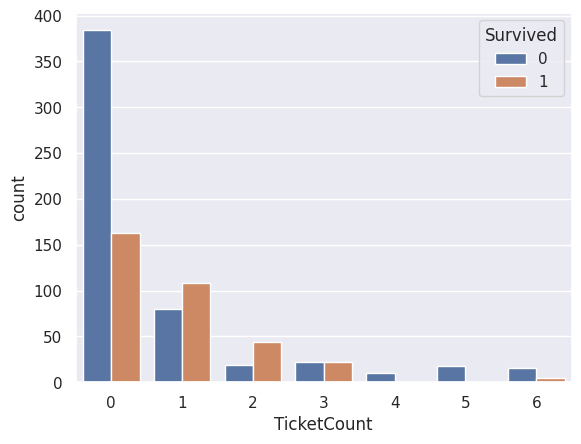

In [119]:
from collections import defaultdict

ticket_counts = defaultdict(lambda: None, df_train["Ticket"].value_counts().to_dict())
df_train['TicketCount'] = df_train["Ticket"].map(ticket_counts, na_action='ignore').fillna(1) - 1
df_test['TicketCount'] = df_test["Ticket"].map(ticket_counts, na_action='ignore').fillna(1) - 1

sns.countplot(data=df_train, x='TicketCount', hue='Survived')

In [120]:
f = lambda n: 1 <= n <= 3

df_train['SmallGroup'] = df_train["TicketCount"].apply(f)
df_test['SmallGroup'] = df_test["TicketCount"].apply(f)

### Deck

In [121]:
df_train['Deck'] = df_train["Cabin"].str[0]
df_test['Deck'] = df_test["Cabin"].str[0]

In [125]:
df_train['Deck'] = df_train.groupby("Pclass")['Deck'].transform(lambda x: x.fillna(x.mode()[0]))
df_test['Deck'] = df_test.groupby("Pclass")['Deck'].transform(lambda x: x.fillna(x.mode()[0]))

### Embarked

In [126]:
df_train['Embarked'] = df_train.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))
df_test['Embarked'] = df_test.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

### Age

In [127]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(["Pclass", "Sex", "Title"])['Age'].transform('mean'))
df_test['Age'] = df_test['Age'].fillna(df_train.groupby(["Pclass", "Sex", "Title"])['Age'].transform('mean'))

Note:  
- Some people use RandomForestRegressor to fill null values.

In [128]:
f = lambda n: n <= 8

df_train['Child'] = df_train["Age"].apply(f)
df_test['Child'] = df_test["Age"].apply(f)

### Family

<Axes: xlabel='Family', ylabel='count'>

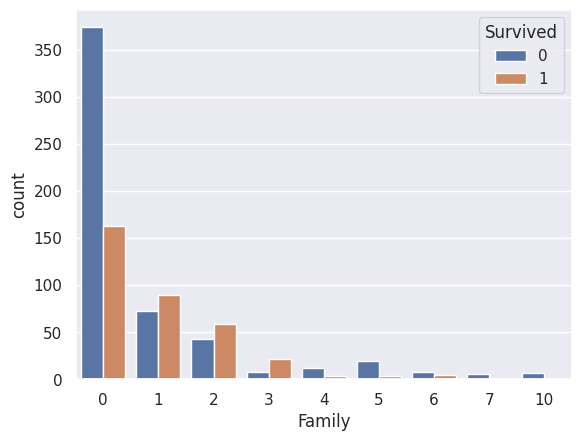

In [129]:
df_train['Family'] = df_train["SibSp"] + df_train["Parch"]
df_test['Family'] = df_test["SibSp"] + df_test["Parch"]

sns.countplot(data=df_train, x='Family', hue='Survived')

In [130]:
f = lambda n: 1 <= n <= 3

df_train['SmallFamily'] = df_train["Family"].apply(f)
df_test['SmallFamily'] = df_test["Family"].apply(f)

### Pclass

In [131]:
df_train["Pclass"] = df_train["Pclass"].apply(str)
df_test["Pclass"] = df_test["Pclass"].apply(str)

### Encoding

In [132]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Cabin    687
dtype: int64

In [133]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

Cabin    327
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_cols = ["Sex"]
for col in encode_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    print('Encoding:', col, le.classes_)

Encoding: Sex ['female' 'male']


Note  
 - One-hot encoding(creating separate columns for each value of column) should not be used with binary valued variables.  
 - Doing so causes **DUMMY VARIABLE TRAP**.

In [135]:
train = pd.get_dummies(df_train.drop(["PassengerId", "Name", "Fare", "Ticket", "Cabin", "Deck"], axis=1))
train_columns = train.columns.tolist()
train_columns.remove(TARGET)

test = pd.get_dummies(df_test.drop(["PassengerId", "Name", "Fare", "Ticket", "Cabin", "Deck"], axis=1))
test = test.reindex(columns=train_columns, fill_value=0)

In [136]:
drop_cols = []
for col, corr in zip(train.corr()[TARGET].index, train.corr()[TARGET]):
    if abs(corr) < 0.1:
        drop_cols.append(col)
print('Dropping cols:', drop_cols)
train = train.drop(drop_cols, axis=1)
test = test.drop(list(set(drop_cols) & set(test.columns)), axis=1)

Dropping cols: ['Age', 'SibSp', 'Parch', 'TicketCount', 'Family', 'Pclass_2', 'Embarked_Q', 'Title_Master', 'Title_Royalty']


### Heatmap

<Axes: >

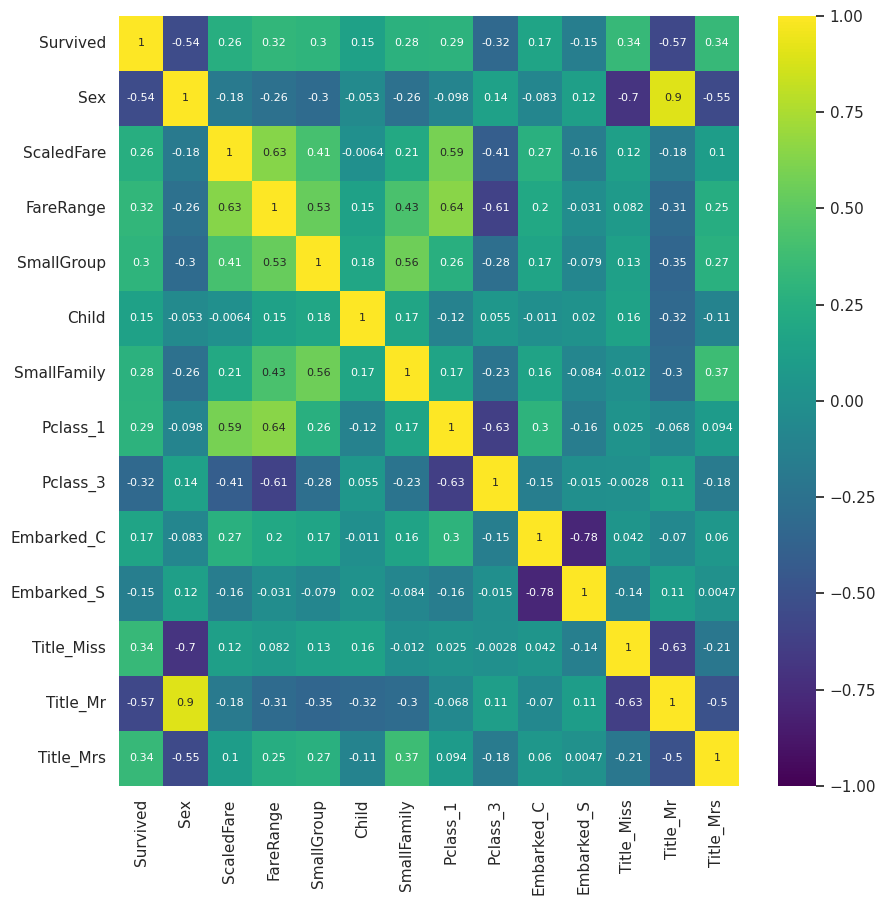

In [137]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 8}, vmin=-1, vmax=1, cmap='viridis')

In [139]:
train = train.drop(["ScaledFare", "Sex", "Pclass_1"], axis=1)
test = test.drop(["ScaledFare", "Sex", "Pclass_1"], axis=1)

print(test.columns)

Index(['FareRange', 'SmallGroup', 'Child', 'SmallFamily', 'Pclass_3',
       'Embarked_C', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')


<Axes: >

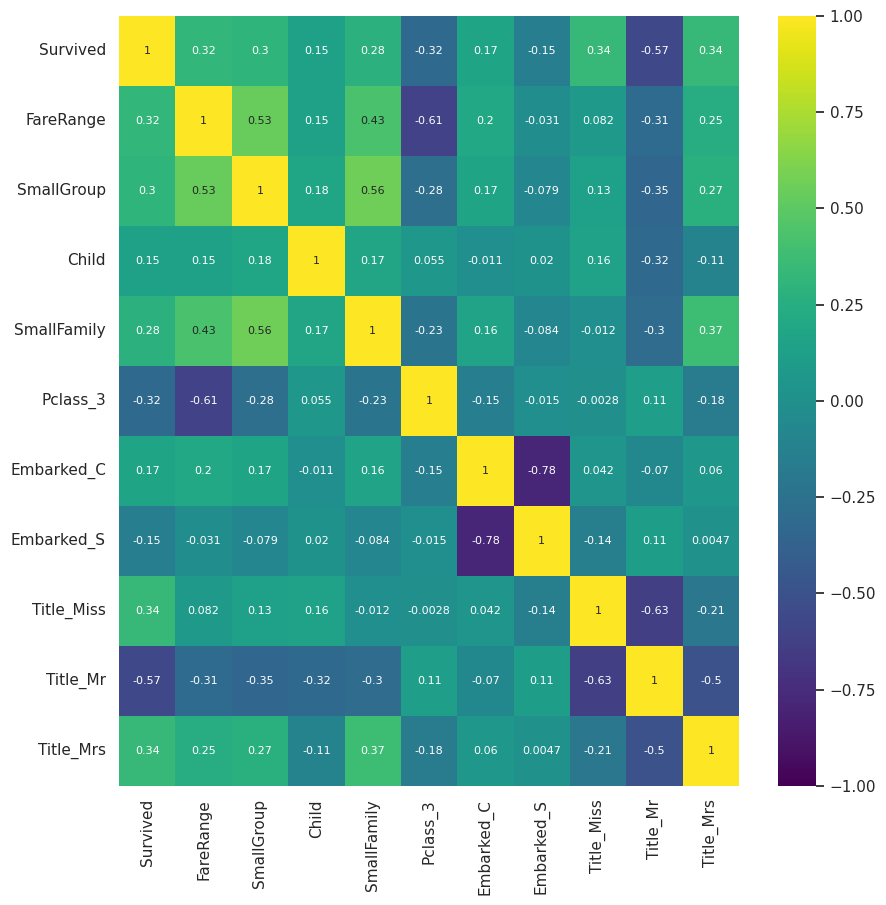

In [140]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 8}, vmin=-1, vmax=1, cmap='viridis')

## Training

In [141]:
from flaml import AutoML
automl = AutoML()
automl_settings = {
    "task": "classification",
    "time_budget": 120,
    "log_file_name": f"{COMPETITION}.log",
    "estimator_list": ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree'],
    "metric": "ap",
}
automl.fit(dataframe=train, label=TARGET, **automl_settings)

[flaml.automl.logger: 02-04 07:27:49] {1679} INFO - task = classification
[flaml.automl.logger: 02-04 07:27:49] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 02-04 07:27:49] {1788} INFO - Minimizing error metric: 1-ap
[flaml.automl.logger: 02-04 07:27:49] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree']
[flaml.automl.logger: 02-04 07:27:49] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-04 07:27:49] {2344} INFO - Estimated sufficient time budget=596s. Estimated necessary time budget=4s.
[flaml.automl.logger: 02-04 07:27:49] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2264,	best estimator lgbm's best error=0.2264
[flaml.automl.logger: 02-04 07:27:49] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-04 07:27:49] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.1929,	best estimator lgbm's best error=0.1929
[flaml.automl.logger: 02-04 07:27:49] {2218} INFO 

In [142]:
from pprint import pprint

print('Best ML leaner:', automl.best_estimator)
print("Best score:", automl.score(train.drop(["Survived"], axis=1), train["Survived"]))
print('Best hyperparmeter config:')
pprint(automl.best_config)

Best ML leaner: xgb_limitdepth
Best score: 0.8664421997755332
Best hyperparmeter config:
{'colsample_bylevel': 0.9323566433691466,
 'colsample_bytree': 0.6896731437425688,
 'learning_rate': 0.5422927115555748,
 'max_depth': 8,
 'min_child_weight': 0.001,
 'n_estimators': 10,
 'reg_alpha': 0.0009765625,
 'reg_lambda': 0.6216118731503589,
 'subsample': 0.9856618891433658}


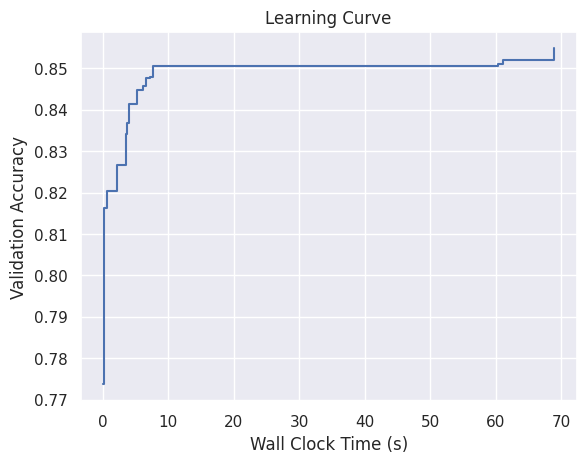

In [143]:
from flaml.automl.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

## Submission

In [144]:
predicted = automl.predict(test).astype('uint8')
submission = pd.DataFrame({ID: df_test[ID], TARGET: predicted})
submission.to_csv('./submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [145]:
! kaggle competitions submit -c {COMPETITION} -f submission.csv -m "Drop Deck"

100% 2.77k/2.77k [00:01<00:00, 2.53kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [146]:
! kaggle competitions submissions {COMPETITION}

fileName               date                 description                              status    publicScore  privateScore  
---------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission.csv         2024-02-04 07:30:37  Drop Deck                                complete  0.7799                     
submission.csv         2024-02-04 07:16:48  FareRange                                complete  0.77511                    
submission.csv         2024-02-03 20:55:15  More time                                complete  0.76555                    
submission.csv         2024-02-03 20:50:36  Add Sex and Pclass_1                     complete  0.75837                    
submission.csv         2024-02-03 20:45:06  Remove SmallFamily                       complete  0.76076                    
submission.csv         2024-02-03 19:51:20  LGBM Classifier                          complete  0.75837                    
submission.csv  

## Reference
- [鐵達尼號的悲劇：預測船難生還者的特徵工程筆記（搭配 FLAML 自動化建模）以及對 Kaggle 競賽的一些觀察](https://alankrantas.medium.com/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%9A%84%E6%82%B2%E5%8A%87-%E9%A0%90%E6%B8%AC%E8%88%B9%E9%9B%A3%E7%94%9F%E9%82%84%E8%80%85%E7%9A%84%E7%89%B9%E5%BE%B5%E5%B7%A5%E7%A8%8B%E7%AD%86%E8%A8%98-%E6%90%AD%E9%85%8D-flaml-%E8%87%AA%E5%8B%95%E5%8C%96%E5%BB%BA%E6%A8%A1-%E4%BB%A5%E5%8F%8A%E5%B0%8D-kaggle-%E7%AB%B6%E8%B3%BD%E7%9A%84%E4%B8%80%E4%BA%9B%E8%A7%80%E5%AF%9F-ca3f4b11af34)
- [Titanic Survival: A complete guide for Beginners](https://www.kaggle.com/code/blurredmachine/titanic-survival-a-complete-guide-for-beginners/notebook)
- [Titanic - Advanced Feature Engineering Tutorial](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook?scriptVersionId=27280410)
- [Visualization to understand how RandomForestClassifier is getting train](https://www.kaggle.com/competitions/titanic/discussion/262100)